# Effects of Political Affiliation and Poverty on COVID Case Rates

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ x ] YES - make available
* [  ] NO - keep private

# Overview

The question that our group wanted to explore for this project was to figure out if there were any specific demographic factors, such as political affiliation or poverty percentage, of a county that directly correlated to the COVID-19 case rate of that county. We hypothesized that counties with higher poverty percentages and more Republican voters would correlate with higher COVID-19 case rates. We cleaned and combined our datasets to make it usable for data analysis and made scatter matrices to see the relationship between the demographic variables (poverty percentage, political affiliation) and the covid case rates. We found that there was no significant correlation between political affiliation and the COVID-19 case rate of counties but there was a slight positive relationship between poverty percentage and case rates.

# Names

- Simon Tsui
- Franklin Le
- Dennis Luc
- Vivian Le
- Elysia Chang

<a id='research_question'></a>
# Research Question

Which demographic factors (poverty percentage, political affiliation), if any, correlate to rises in Covid-19 cases (cases rates) in each county within the United States in 2020?

<a id='background'></a>

## Background & Prior Work

The COVID-19 outbreak has had a profound impact on the everyday lives of Americans. This highly contagious virus has shown to spread easily through human-to-human transmission. Since the pandemic began, the United States has had a hard time containing COVID-19. 

The virus’s impact across the United States has been disproportionate. Inequality in socioeconomic status causes the virus to impact communities differently. Lower income and marginalized communities, especially racial minorities like black and Hispanic, are more likely to suffer from COVID-19 because they lack access to effective health care services. Evidence from research also shows that these communities suffer from higher rates of chronic health conditions that increase their risk and vulnerability of contracting the virus. In addition, many low-income jobs in fields such as retail, hospitality, manufacturing production, etc. cannot be performed remotely, and so many of them are forced to work in high risk conditions with no paid sick leave or health insurance. (source 1)(source 2) 

Since the federal system grants states the ultimate authority to decide how to respond to the pandemic, different state policymakers have responded to the pandemic differently. The debate on how to adequately respond to COVID-19 has been heavily politicized. There is research that shows how the governor’s party affiliation can influence them to make decisions such as the ones regarding to mask mandates and lockdowns that in turn directly affect the infection and death rate of each of the different states across the United States. (source 3)

References:
- Source 1. https://www.hrw.org/news/2020/03/19/us-address-impact-covid-19-poor 
- Source 2. https://iopscience.iop.org/article/10.1088/2632-072X/ac0fc7 
- Source 3. https://www.sciencedirect.com/science/article/pii/S0749379721001355

# Hypothesis


Given the demographic factors (poverty percentage, political affiliation), the counties with higher poverty rates would have higher  COVID case rates; and counties with more Republican voters would would have higher COVID case rates than counties with more Demographic voters.

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.


The datasets that we are using to answer this question are the poverty percentage dataset, the political affiliation dataset and the COVID-19 cases datasets. In all of these datasets, it is all sorted by counties in the United States, which is important because it helps us split up and identify each demographic factor much more easily.
1)

- Dataset Name: Small Area Income and Poverty Estimates (SAIPE)
- Link to the dataset: https://raw.githubusercontent.com/changt060/Datasets/main/SAIPESNC_09DEC21_01_47_13_51.csv
- Number of observations: 3193
- This dataset includes the population and the poverty percentage of each one of those counties in the United States in 2019.

2)

- Dataset Name: Election, COVID, and Demographic Data by County
- Link to the dataset: https://www.kaggle.com/etsc9287/2020-general-election-polls
- Number of observations: 4867
- This dataset shows the election results from the United States, which is also separated by counties. The dataset shows the percentage of people from each county that have voted for Biden or Trump in the 2020 election. This can provide us with a general estimate of which political party that county skews towards. 

3)
- Dataset Name: US counties COVID 19 dataset
- Link to the dataset: https://www.kaggle.com/fireballbyedimyrnmom/us-counties-covid-19-dataset
- Number of observations: 1995353
- This dataset contains the cumulative counts of coronavirus cases in the United States, at the state and county level, over time (recorded daily). 

To combine these datasets, we will grab the population and the poverty percentage info from the SAIPE dataset, the percentage of people who have voted for Biden or Trump in the 2020 election from the election dataset, and the cumulative counts of coronavirus cases by 8/31/2020 from the COVID-19 dataset and merge them based on the county and the state names.

# Setup

In [1]:
import numpy as np
import pandas as pd 
import math
from datetime import datetime
import seaborn as sns
import patsy
import statsmodels.api as sm

# Data Cleaning

Convert the imported COVID-19 dataset to a dataframe.

In [2]:
covid_cases_df = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")
covid_cases_df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
1998599,2021-12-09,Sweetwater,Wyoming,56037.0,8188,103.0
1998600,2021-12-09,Teton,Wyoming,56039.0,5436,14.0
1998601,2021-12-09,Uinta,Wyoming,56041.0,4084,31.0
1998602,2021-12-09,Washakie,Wyoming,56043.0,1859,36.0


We see that there are multiple entries for the cumulative COVID-19 cases recorded daily for each county. Because we only want to consider the time frame starting from the onset of the pandemic going up to 2020/8/31, the code below finds the entries that record the total COVID-19 cases recorded on 2020/8/31 for each county and stores the results in a new dataframe called `cases_by_counties_df`

In [3]:
cases_by_counties_df = covid_cases_df[covid_cases_df['date'] == '2020-08-31'].reset_index()
cases_by_counties_df = cases_by_counties_df[['county', 'state', 'cases']]
cases_by_counties_df

,county,state,cases
0,Autauga,Alabama,1442
1,Baldwin,Alabama,4545
2,Barbour,Alabama,757
3,Bibb,Alabama,554
4,Blount,Alabama,1287
...,...,...,...
3228,Sweetwater,Wyoming,302
3229,Teton,Wyoming,430
3230,Uinta,Wyoming,298
3231,Washakie,Wyoming,107


In [4]:
# standardize county and state names for cases_by_counties_df
cases_by_counties_df['county'] = cases_by_counties_df['county'].str.lower()
cases_by_counties_df['state'] = cases_by_counties_df['state'].str.lower()

# assert that there are no missing data in each row
assert cases_by_counties_df.isnull().any(axis=1).sum() == 0

In [5]:
cases_by_counties_df

,county,state,cases
0,autauga,alabama,1442
1,baldwin,alabama,4545
2,barbour,alabama,757
3,bibb,alabama,554
4,blount,alabama,1287
...,...,...,...
3228,sweetwater,wyoming,302
3229,teton,wyoming,430
3230,uinta,wyoming,298
3231,washakie,wyoming,107


Convert the imported dataset with presidential election data from the 2016 and 2020 presidential elections to a dataframe.

In [6]:
political_affiliation_df = pd.read_csv("https://raw.githubusercontent.com/denniskluc/Datasets/main/county_statistics.csv")
political_affiliation_df

,Unnamed: 0,county,state,percentage16_Donald_Trump,percentage16_Hillary_Clinton,total_votes16,votes16_Donald_Trump,votes16_Hillary_Clinton,percentage20_Donald_Trump,percentage20_Joe_Biden,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,Abbeville,SC,0.629,0.346,10724.0,6742.0,3712.0,0.661,0.330,...,1.8,1.8,6.5,25.8,9505.0,78.8,13.3,7.8,0.1,9.4
1,1,Acadia,LA,0.773,0.206,27386.0,21159.0,5638.0,0.795,0.191,...,1.6,2.2,2.5,27.6,24982.0,80.0,12.1,7.6,0.3,8.9
2,2,Accomack,VA,0.545,0.428,15755.0,8582.0,6737.0,0.542,0.447,...,2.6,1.8,4.5,22.0,13837.0,74.6,18.1,7.1,0.2,5.4
3,3,Ada,ID,0.479,0.387,195587.0,93748.0,75676.0,0.504,0.465,...,1.5,2.8,6.9,20.4,214984.0,78.3,15.0,6.6,0.1,4.3
4,4,Adair,IA,0.653,0.300,3759.0,2456.0,1127.0,0.697,0.286,...,2.8,0.4,6.2,22.3,3680.0,73.8,15.3,10.4,0.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4862,4950,Valdez-Cordova Census Area,AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.1,2.8,3.8,11.0,4755.0,56.9,34.6,7.8,0.7,7.5
4863,4951,Wrangell City and Borough,AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.8,5.8,8.4,9.4,1095.0,52.5,32.3,12.5,2.6,7.0
4864,4952,Yakutat City and Borough,AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.9,5.0,4.2,6.5,377.0,45.6,44.0,10.3,0.0,6.5
4865,4953,Yukon-Koyukuk Census Area,AK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.8,19.2,8.0,8.4,2082.0,38.8,56.5,4.7,0.0,19.7


Extract the columns that are relevant to our research question. The new dataframe includes the percentage of votes Trump received and the percentage of votes Biden received, by county, for the 2020 presidential election.

In [7]:
political_affiliation_df = political_affiliation_df[['county', 'state', 'percentage20_Donald_Trump', 'percentage20_Joe_Biden']]
political_affiliation_df

,county,state,percentage20_Donald_Trump,percentage20_Joe_Biden
0,Abbeville,SC,0.661,0.330
1,Acadia,LA,0.795,0.191
2,Accomack,VA,0.542,0.447
3,Ada,ID,0.504,0.465
4,Adair,IA,0.697,0.286
...,...,...,...,...
4862,Valdez-Cordova Census Area,AK,NaN,NaN
4863,Wrangell City and Borough,AK,NaN,NaN
4864,Yakutat City and Borough,AK,NaN,NaN
4865,Yukon-Koyukuk Census Area,AK,NaN,NaN


In [8]:
# standardize county names for political_affiliation_df
political_affiliation_df['county'] = political_affiliation_df['county'].str.lower()

# standardize state names for political_affiliation_df
states_dict = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}
# remap all state abbreviations with full names
political_affiliation_df['state'] = political_affiliation_df['state'].map(states_dict).fillna(political_affiliation_df['state'])
political_affiliation_df['state'] = political_affiliation_df['state'].str.lower()

# drop all rows where voting info for that county is missing
political_affiliation_df = political_affiliation_df[political_affiliation_df['percentage20_Donald_Trump'].notna() & political_affiliation_df['percentage20_Joe_Biden'].notna()]

# assert that there are no missing data in each row
assert political_affiliation_df.isnull().any(axis=1).sum() == 0

<ipython-input-8-29fe3eaa4001>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  political_affiliation_df['county'] = political_affiliation_df['county'].str.lower()
<ipython-input-8-29fe3eaa4001>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  political_affiliation_df['state'] = political_affiliation_df['state'].map(states_dict).fillna(political_affiliation_df['state'])
<ipython-input-8-29fe3eaa4001>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

In [9]:
political_affiliation_df

,county,state,percentage20_Donald_Trump,percentage20_Joe_Biden
0,abbeville,south carolina,0.661,0.330
1,acadia,louisiana,0.795,0.191
2,accomack,virginia,0.542,0.447
3,ada,idaho,0.504,0.465
4,adair,iowa,0.697,0.286
...,...,...,...,...
4651,woonsocket,rhode island,0.454,0.529
4652,worcester,vermont,0.200,0.744
4654,wrentham,massachusetts,0.427,0.544
4655,yarmouth,massachusetts,0.389,0.590


Convert the imported dataset with demographic information on population and poverty info, by county, into a dataframe.

In [10]:
poverty_population_df = pd.read_csv("https://raw.githubusercontent.com/changt060/Datasets/main/SAIPESNC_09DEC21_01_47_13_51.csv")
poverty_population_df

,Year,State,County ID,State / County Name,All Ages SAIPE Poverty Universe,All Ages in Poverty Count,All Ages in Poverty Count LB 90%,All Ages in Poverty Count UB 90%,90% Confidence Interval (All Ages in Poverty Count),All Ages in Poverty Percent,...,Under Age 5 in Poverty Count UB 90%,90% Confidence Interval (Under Age 5 in Poverty Count),Under Age 5 in Poverty Percent,Under Age 5 in Poverty Percent LB 90%,Under Age 5 in Poverty Percent UB 90%,90% Confidence Interval (Under Age 5 in Poverty Percent),Median Household Income in Dollars,Median Household Income in Dollars LB 90%,Median Household Income in Dollars UB 90%,90% Confidence Interval (Median Household Income in Dollars)
0,2019,0,0,United States,"320,118,791","39,490,096","39,248,096","39,732,096","39,248,096 to 39,732,096",12.3,...,"3,509,524","3,405,854 to 3,509,524",18.2,17.9,18.5,17.9 to 18.5,"$65,712","$65,594","$65,830","$65,594 to $65,830"
1,2019,1,1000,Alabama,"4,781,642","747,478","730,491","764,465","730,491 to 764,465",15.6,...,"73,176","65,296 to 73,176",24.2,22.8,25.6,22.8 to 25.6,"$51,771","$51,179","$52,363","$51,179 to $52,363"
2,2019,1,1001,Autauga County (AL),"55,364","6,723","5,517","7,929","5,517 to 7,929",12.1,...,NaN,NaN,NaN,NaN,NaN,NaN,"$58,233","$52,517","$63,949","$52,517 to $63,949"
3,2019,1,1003,Baldwin County (AL),"220,556","22,360","18,541","26,179","18,541 to 26,179",10.1,...,NaN,NaN,NaN,NaN,NaN,NaN,"$59,871","$54,593","$65,149","$54,593 to $65,149"
4,2019,1,1005,Barbour County (AL),"21,801","5,909","4,787","7,031","4,787 to 7,031",27.1,...,NaN,NaN,NaN,NaN,NaN,NaN,"$35,972","$31,822","$40,122","$31,822 to $40,122"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,2019,56,56037,Sweetwater County (WY),"41,469","3,453","2,743","4,163","2,743 to 4,163",8.3,...,NaN,NaN,NaN,NaN,NaN,NaN,"$80,639","$73,437","$87,841","$73,437 to $87,841"
3190,2019,56,56039,Teton County (WY),"23,247","1,396","1,073","1,719","1,073 to 1,719",6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"$98,837","$86,531","$111,143","$86,531 to $111,143"
3191,2019,56,56041,Uinta County (WY),"20,017","1,699","1,264","2,134","1,264 to 2,134",8.5,...,NaN,NaN,NaN,NaN,NaN,NaN,"$70,756","$63,191","$78,321","$63,191 to $78,321"
3192,2019,56,56043,Washakie County (WY),"7,644",845,626,"1,064","626 to 1,064",11.1,...,NaN,NaN,NaN,NaN,NaN,NaN,"$55,122","$50,050","$60,194","$50,050 to $60,194"


Extract the columns that are relevant to our research question. The new dataframe includes the poverty percentage and the population for thousands of counties across the United States.

In [11]:
poverty_population_df = poverty_population_df[['State / County Name', 'All Ages SAIPE Poverty Universe', 'All Ages in Poverty Percent']]
poverty_population_df

,State / County Name,All Ages SAIPE Poverty Universe,All Ages in Poverty Percent
0,United States,"320,118,791",12.3
1,Alabama,"4,781,642",15.6
2,Autauga County (AL),"55,364",12.1
3,Baldwin County (AL),"220,556",10.1
4,Barbour County (AL),"21,801",27.1
...,...,...,...
3189,Sweetwater County (WY),"41,469",8.3
3190,Teton County (WY),"23,247",6.0
3191,Uinta County (WY),"20,017",8.5
3192,Washakie County (WY),"7,644",11.1


In [12]:
# drop rows not describing info on county level
poverty_population_df = poverty_population_df[poverty_population_df['State / County Name'].str.contains('\(')].reset_index()
poverty_population_df.drop('index', axis=1, inplace=True)

# standardize state and county names for poverty_population_df
poverty_population_df['State / County Name'] = poverty_population_df['State / County Name'].str.lower()
poverty_population_df['State / County Name'] = poverty_population_df['State / County Name'].str.replace("county", "")
poverty_population_df['State / County Name'] = poverty_population_df['State / County Name'].str.strip()
poverty_population_df['state'] = poverty_population_df['State / County Name'].str[-3:-1] # extract state abbreviations
poverty_population_df['state'] = poverty_population_df['state'].str.upper()
poverty_population_df['state'] = poverty_population_df['state'].map(states_dict).fillna(poverty_population_df['state']) # remap all state abbreviations with full names
poverty_population_df['state'] = poverty_population_df['state'].str.lower()
poverty_population_df['State / County Name'] = poverty_population_df['State / County Name'].str[:-4] # extract county names
poverty_population_df['State / County Name'] = poverty_population_df['State / County Name'].str.strip()
poverty_population_df.rename(columns={'State / County Name': 'county', 'All Ages SAIPE Poverty Universe':'population', 'All Ages in Poverty Percent':'poverty percent'}, inplace=True)

# drop all rows where population or poverty info for that county is missing
poverty_population_df = poverty_population_df[poverty_population_df['population'].notna() & poverty_population_df['poverty percent'].notna()]

# get the case rate info by dividing number of cases by total population of each county
poverty_population_df['population'] = poverty_population_df['population'].str.replace(',', '')
poverty_population_df['population'] = poverty_population_df['population'].astype(float)

# assert that there are no missing data in each row
assert poverty_population_df.isnull().any(axis=1).sum() == 0

In [13]:
poverty_population_df

,county,population,poverty percent,state
0,autauga,55364.0,12.1,alabama
1,baldwin,220556.0,10.1,alabama
2,barbour,21801.0,27.1,alabama
3,bibb,20217.0,20.3,alabama
4,blount,57246.0,16.3,alabama
...,...,...,...,...
3137,sweetwater,41469.0,8.3,wyoming
3138,teton,23247.0,6.0,wyoming
3139,uinta,20017.0,8.5,wyoming
3140,washakie,7644.0,11.1,wyoming


Do an inner join on the 3 cleaned datasets based on the state and county name of each entry to get our main dataset `merge2_df`

In [14]:
# merge political_affiliation_df and poverty_population_df
merge1_df = pd.merge(political_affiliation_df, poverty_population_df, on=['county', 'state'], how='inner')

#merge merge1_df and cases_by_counties_df
merge2_df = pd.merge(merge1_df, cases_by_counties_df, on=['county', 'state'], how='inner')

In [15]:
# get the case rate info by dividing number of cases by total population of each county
merge2_df['case_rate'] = merge2_df['cases']/merge2_df['population']
merge2_df

,county,state,percentage20_Donald_Trump,percentage20_Joe_Biden,population,poverty percent,cases,case_rate
0,abbeville,south carolina,0.661,0.330,23737.0,14.8,418,0.017610
1,accomack,virginia,0.542,0.447,31899.0,16.4,1145,0.035895
2,ada,idaho,0.504,0.465,469648.0,9.4,11176,0.023797
3,adair,iowa,0.697,0.286,6981.0,10.7,49,0.007019
4,adair,kentucky,0.830,0.159,17908.0,21.4,270,0.015077
...,...,...,...,...,...,...,...,...
2997,yuma,colorado,0.826,0.156,9793.0,12.8,63,0.006433
2998,zapata,texas,0.525,0.471,14117.0,30.1,276,0.019551
2999,zavala,texas,0.340,0.654,11403.0,29.6,287,0.025169
3000,ziebach,south dakota,0.446,0.531,2749.0,47.7,48,0.017461


# Data Analysis & Results

To visualize our cleaned data, we first use scatter matrices.

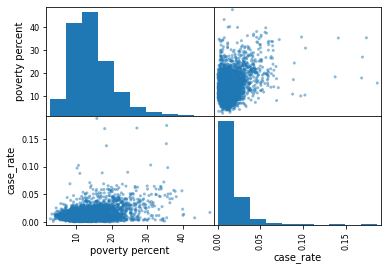

In [16]:
fig1 = pd.plotting.scatter_matrix(merge2_df[["poverty percent", "case_rate"]])

We see that the poverty percentage in each county has a normal distribution that is skewed to the right.

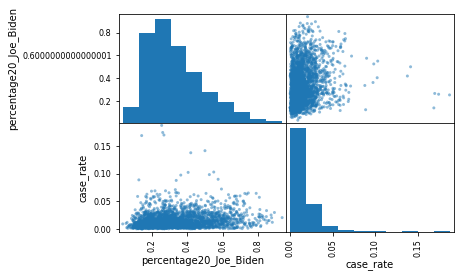

In [17]:
fig2 = pd.plotting.scatter_matrix(merge2_df[["percentage20_Joe_Biden", "case_rate"]])

The percentage of people who voted for Joe Biden in 2020 in each county also has a normal distribution that is skewed to the right.

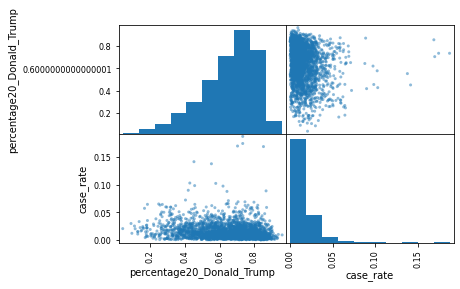

In [18]:
fig3 = pd.plotting.scatter_matrix(merge2_df[["percentage20_Donald_Trump", "case_rate"]])

The percentage of people who voted for Donald Trump in 2020 in each county has a normal distribution that is skewed to the left.

Now let's look at the relationship between the different demographic factors and the total number of COVID cases in each county during the period from the beginning of 2020 to the end of August 2020.

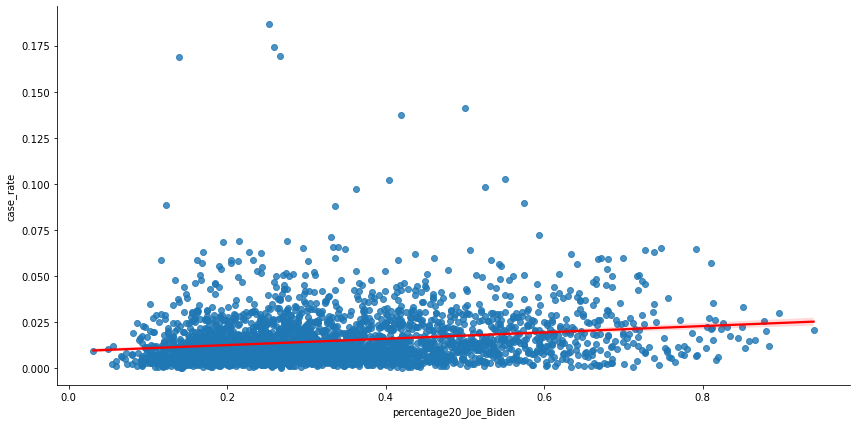

In [19]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
sns.lmplot(x='percentage20_Joe_Biden', y='case_rate', 
           data=merge2_df, line_kws={'color': 'red'}, fit_reg=True, 
           height=6, aspect=2)

Looking at the graph, there seems to be a slight correlation between the percentage of people who voted for Joe Biden and the COVID case rate in the county. Most of the total number of COVID case rate in each county falls below 7.5%, with the exception of a couple outliers. The slope of our line of best fit seems to have a small positive value. Note that the value can be affected by the these extreme outliers on the top.

In [25]:
outcome, predictors = patsy.dmatrices('case_rate ~ percentage20_Joe_Biden', merge2_df)
mod_log = sm.OLS(outcome, predictors)
fit_res = mod_log.fit()
print(fit_res.summary())

                            OLS Regression Results                            
Dep. Variable:              case_rate   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     116.2
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           1.28e-26
Time:                        17:16:52   Log-Likelihood:                 8603.4
No. Observations:                3002   AIC:                        -1.720e+04
Df Residuals:                    3000   BIC:                        -1.719e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

We have a very small p-value of 1.28e-26, which suggests that the positive correlation between counties with higher percentages of Joe Biden voters and higher COVID case rates is statistically significant. 

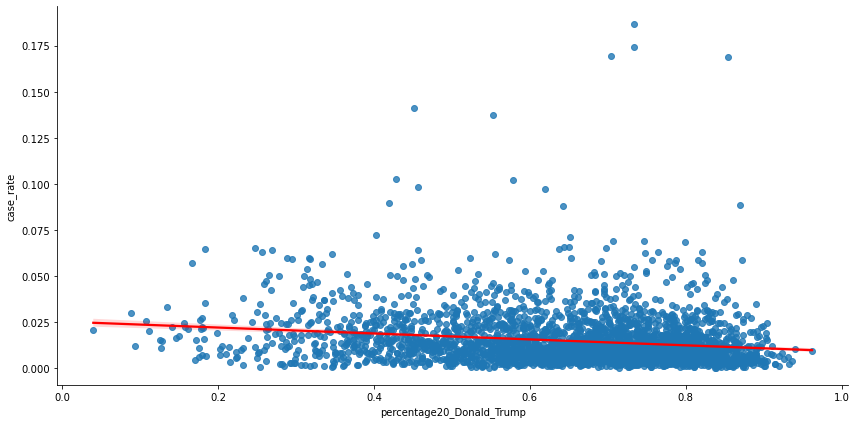

In [21]:
sns.lmplot(x='percentage20_Donald_Trump', y='case_rate', 
           data=merge2_df, line_kws={'color': 'red'}, fit_reg=True, 
           height=6, aspect=2)

Looking at the graph, there seems to be no apparent correlation between the percentage of people who voted for Donald Trump and the COVID case rate in the county. Most of the total number of COVID case rate in each county falls below 7.5%, with the exception of a couple outliers. In contrast to the graph above, the slope of our line of best fit here seems to have a small negative value, but it is again probably affected by the these extreme outliers on the top.

In [24]:
outcome, predictors = patsy.dmatrices('case_rate ~ percentage20_Donald_Trump', merge2_df)
mod_log = sm.OLS(outcome, predictors)
fit_res = mod_log.fit()
print(fit_res.summary())

                            OLS Regression Results                            
Dep. Variable:              case_rate   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     102.9
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           8.34e-24
Time:                        17:15:34   Log-Likelihood:                 8597.0
No. Observations:                3002   AIC:                        -1.719e+04
Df Residuals:                    3000   BIC:                        -1.718e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

We have a very small p-value of 8.34e-24, which suggests that the negative correlation between counties with higher percentages of Donald Trump voters and higher COVID case rates is statistically significant. 

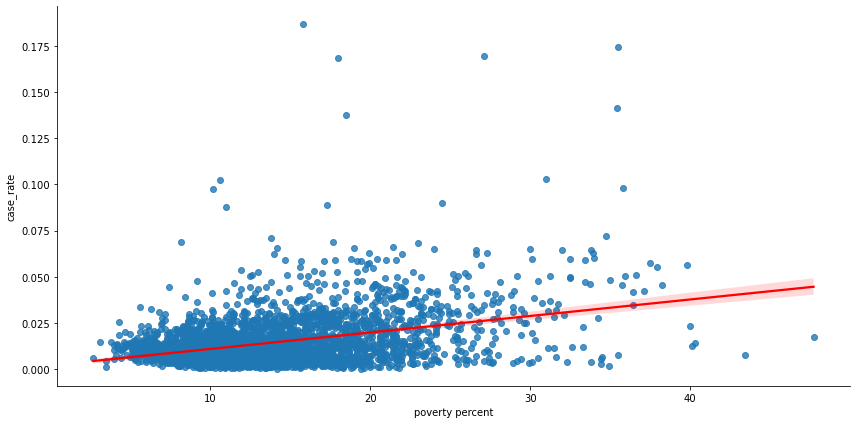

In [22]:
sns.lmplot(x='poverty percent', y='case_rate', 
           data=merge2_df, line_kws={'color': 'red'}, fit_reg=True, 
           height=6, aspect=2)

There seems to be a slight correlation between the percentage of people who identified themselves to be in poverty and the number of people who got COVID. We can see a slightly more apparent upward trend in the slope of the line. The positively-sloped line of best fit suggests that there is a positive correlation here. However, this can be again affected by the extreme outliers on the top, which are counties that have extremely high COVID case rates, and also to some extent some outlier counties that have poverty percentage greater than 35%.

In [23]:
merge2_df = merge2_df.rename(columns={"poverty percent": "poverty_percent"})
outcome, predictors = patsy.dmatrices('case_rate ~ poverty_percent', merge2_df)
mod_log = sm.OLS(outcome, predictors)
fit_res = mod_log.fit()
print(fit_res.summary())

                            OLS Regression Results                            
Dep. Variable:              case_rate   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     458.0
Date:                Fri, 10 Dec 2021   Prob (F-statistic):           1.09e-94
Time:                        16:02:14   Log-Likelihood:                 8759.6
No. Observations:                3002   AIC:                        -1.752e+04
Df Residuals:                    3000   BIC:                        -1.750e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0021      0.001     

We have a very small p-value of 1.09e-94, which suggests that the positive correlation between counties with higher poverty percentages and higher COVID case rates is statistically significant. 

# Ethics & Privacy

Within our data collection process and our research question we required quite a bit of personal information from each person. These kinds of information includes: population, poverty, covid cases and political affiliations. With population it doesn’t really concern about andy biases, privacy or terms because it is required by law that every single household must fill in a population census every four years. For the poverty measure it might raise a little bit of a problem due to everyone having a different income level, and not everyone will be honest on their income level due to embarrassment or other internal/external factors. Unless the data is taken straight from the IRS, showing the income levels of each family, the data will be less biased. But that doesn’t change the fact that we are using other people’s “personal” data, as we know for a fact that some families would rather not let other people know their income levels (poverty level); so that is one of the privacy concerns we might have in our data using process. The next information we used are the covid cases; this similar to the population data gathering wouldn’t be much of a concern on privacy or any terms because of the massive effect the pandemic and covid-19 has in our society. But I still think it can cause some biases due to one: people that don’t know that they have covid might just ignore it and don’t report, or two: people that know they do have covid might want to hide it. So it is most likely guaranteed that the data collected from each county for each covid case will be the lowest tightest bound of covid cases. As it is very difficult to have false positives in covid tests and the fact that there would be an unknown number of people that falls into the two groups listed above. The final “personal” information that we used was the political affiliation of each county,  which in this case might have the most problems from all the previous ones. First, there will be bias within the data collection process because we based the political affiliation of the county on the 2020 election. So there will be biases though some democrats might vote for Trump and some republicans will vote for Biden. Not only that, there are a lot of people that did not vote in the 2020 election, thus a huge amount of the population is not represented in this dataset. But some portion of the reason is that all people under the age of 18 would not be represented and that there are just some people that do not want to vote. In addition, during the data using process for some counties the score between the two parties might be super close, (for example .506 for Trump and .484 for Biden), we would have ruled that as a republican county as still technically the majority of the population in that county were in favor of Trump. This might also cause biases toward each political party. Not only that a lot of people prefer to keep their political affiliation as a secret; thus the usage of this data set will also breach the privacy of the people used in the data. <br>

In order to resolve these biases/privacy issues for each of the data we gathered we will have to first let the people of each county know that we might be using their data in advance. In addition, we will not enclose any data about each specific person (there is no way we know), for privacy reasons. <br>

 Additionally for covid cases: Thus to counteract this bias, we can add a constant percentage of people for each county to take into account the people that have covid but did not report. <br>

 Additionally for political affiliation: We might want to add an additional party (neutral) if the score between the two parties are close. And we can’t really do much for the people that did not vote as it is their own choice; thus the bias will always be there.<br>

# Conclusion & Discussion

We wanted to see if there was a relationship between particular demographic factors, like political affiliation and poverty percentage, and the rate of COVID-19 cases within counties across the United States. Our hypothesis was that U.S. counties with a higher poverty percentage and more Republican voters than Democratic voters will have higher COVID-19 case rates. After our analysis, we found that there is a positive correlation between higher poverty percentages and higher COVID rates. Also, to our surprise, we found that counties with more Republican voters actually had a negative correlation with COVID-19 case rates, and counties with more Democratic voters had a positive correlation with COVID-19 case rates. This may be due to the fact that Democratic counties tend to be more populated than  Republican counties, and thus are  more susceptible to wide-scale COVID outbreaks. <br>

Some limitations of this project include the data used to represent the variables we chose, like the political affiliation of a county. As it is a personal and private choice, there is no data to ethically show individual political affiliation so we had to use an indirect measure in order to do our analysis. Another limitation is that the nature of COVID-19 fluctuated throughout the pandemic with different factors, outside the ones we chose to explore for our project, affecting the case rates. We also used a single date to collect the case rates of all the counties in the U.S. which probably doesn’t accurately represent the true number of case rates. throughout the pandemic.<br>

Exploring the types of factors that exacerbate or alleviate the case rates of an area is important to address since we may find that there are ways we could prevent further spread and infection of COVID. With the pandemic becoming so politicized, it's important to see if and how the choices of the policymakers are helping or hurting the community. <br>


# Team Contributions

*Specify who in your group worked on which parts of the project.*
- Simon Tsui: Some portion of exploratory data analysis, ethics and privacy, and background & prior work
- Franklin Le: Contributued to research question and background & prior work,  helped out on data cleaning and visualizations
- Dennis Luc: Helped with formulation of project idea and hypothesis, worked on data cleaning, worked on exploratory data analysis
- Vivian Le: Wrote Overview, wrote Background & Prior Work, Research Question, and Conclusion & Discussion
- Elysia Chang: Wrote background and prior work, finding datasets, data cleaning

